# Partial differential equations

Part of this notebook is adapted from [David Miller's course](https://github.com/UChicagoPhysics/PHYS250) at UChicago

In [52]:
import numpy as np

# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
%matplotlib inline


# Partial differential equations

+ Think of these as an infinite set of ordinary differential equations is called a partial differential equation (PDE).
+ In numerical methods, we split up this set into a finite set of ODEs, usually by "meshing" the domain into a finite set of points.

There are several types of PDEs, elliptical, hyperbolic, and parabolic.



| Type     | Equation | Example     |
| :---        |    :----:   |    :----:   |
| Elliptical      | $u'' + u'' = 0$      | Laplace's equation      |
| Hyperbolic      | $\ddot{u} = u''$       | Wave equation      |
| Parabolic      | $\dot{u} = u''$       | Heat equation      |

where $u' = \frac{\partial u}{\partial x}$ and $\dot{u} = \frac{\partial u}{\partial t}$ in the table


#### Today, we will focus on elliptical and parabolic PDEs

# Laplace's Equation, Boundary Value Problems, and Finite Difference Methods

Numerical solutions to many physical problems can be found using finite difference methods. In this approach, a regular grid is imposed on a region. At each point on the grid, the differential equation governing the system is approximated. The resulting equations are then solved iteratively. The relaxation method is a relatively simple example. The problem is to find the potential $V$ in empty regions ($\rho$ = 0) when $V$ is known on the boundaries.

The Laplace equation is of fundamental importance in physics, and is most often first encountered in electrodynamics.

$$
\nabla^{2} V = 0.
$$

The solution to Laplace's equation can be thought of as taking many small averages around each point and then assigning those averages to the point in the middle. 

For simple surfaces---flat planes, cylinders, spheres---it is easy to solve these systems analytically. 

However, when the geometry of the system becomes complex, it is often necessary to evaluate the solutions to Laplace's equation numerically, typically using a simple program that iteratively averages around the point at which the solution is being evaluated.

## Boundary Value Problem

Given a specification of the potential $V$ on the boundary of a region, we wish to find the the solution to Laplace's equation in order to find the potential $V$ everywhere in the region.

## Electrodynamics

In E&M, we're often taught the solution to Laplace's equation in two dimensions, $V(x,y)$, can be found by evaluating:

$$
V(x,y) = \frac{1}{2\pi R} \oint_{\rm circle} V dl
$$

iteratively, until the change in $V(x,y)$ on successive evaluations of this expression is smaller than some tolerance. 


If the path is taken as a single mesh cell, then this can be written as:

$$
V_{i,j} = \frac{1}{4} \left( V_{i+1,j} + V_{i-1,j} + V_{i,j+1} + V_{i,j-1} \right)
$$

where $V_{i,j}$ is the value of $V$ at the point $(x_i, y_j)$.

In [53]:
class LaplaceEquation:
    """
    Class to solve the Laplace equation in 2D using the Jacobi method.

    Attributes:
        initial_lattice (np.ndarray): Initial lattice with boundary conditions
        max_iterations (int): Maximum number of iterations
        tolerance (float): Tolerance for convergence
        store_history (bool): Whether to store the history of the grid at each iteration

    Methods:
        solve: Solve the Laplace equation
        update_grid: Update the grid site-by-site

    """

    def __init__(self, initial_lattice, max_iterations=10000, tolerance=1e-4, store_history=False):
        self.initial_lattice = initial_lattice
        self.n, self.m = initial_lattice.shape
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.store_history = store_history

    def solve(self):

        ## Initialize grid with zeros
        grid = np.copy(self.initial_lattice)

        if self.store_history:
            self.history = [grid.copy()]

        ## Iterate until convergence
        for iteration in range(self.max_iterations):
            # Copy current grid
            grid_old = np.copy(grid)

            # The actual update and physical simulation goes here
            grid = self.update_grid(grid)

            ## Store history
            if self.store_history:
                self.history.append(grid.copy())

            ## Check for convergence
            if np.linalg.norm(grid - grid_old) < self.tolerance:
                print('Converged after {} iterations.'.format(iteration))
                break

        return grid

    def update_grid(self, grid):

        # ## Update grid site-by-site
        # for i in range(1, self.n - 1):
        #     for j in range(1, self.m - 1):
        #         grid[i, j] = 0.25 * (grid[i - 1, j] + grid[i + 1, j] + grid[i, j - 1] + grid[i, j + 1])

         ## Vectorized implementation of the above loop
        grid[1:-1, 1:-1] = 0.25 * (grid[0:-2, 1:-1] + grid[2:, 1:-1] + grid[1:-1, 0:-2] + grid[1:-1, 2:])
        grid[1:-1, 1:-1] = 0.25 * (grid[0:-2, 1:-1] + grid[2:, 1:-1] + grid[1:-1, 0:-2] + grid[1:-1, 2:])

        return grid



Text(0.5, 1.0, 'East')

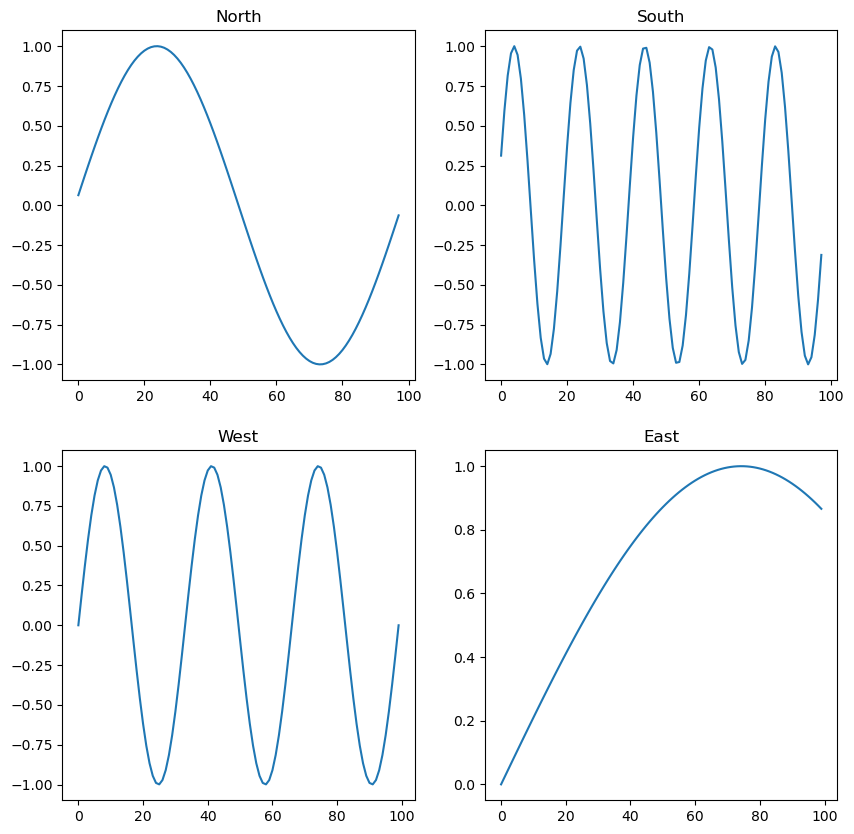

In [54]:
# Define initial lattice and complex boundary conditions
n_x = 100
initial_lattice = np.zeros((n_x, n_x))
initial_lattice[0, :] = np.sin(np.linspace(0, 2 * np.pi, n_x))
initial_lattice[-1, :] = np.sin(np.linspace(0, 2 * np.pi * 5, n_x))
initial_lattice[:, 0] = np.sin(np.linspace(0, 2 * np.pi * 3, n_x))
initial_lattice[:, -1] = np.sin(np.linspace(0, 2 * np.pi / 3, n_x))

## Plot North, South, East, and West boundary conditions
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(initial_lattice[0, 1:-1])
plt.title('North')
plt.subplot(222)
plt.plot(initial_lattice[-1, 1:-1])
plt.title('South')
plt.subplot(223)
plt.plot(initial_lattice[:, 0])
plt.title('West')
plt.subplot(224)
plt.plot(initial_lattice[:, -1])
plt.title('East')

Converged after 5023 iterations.


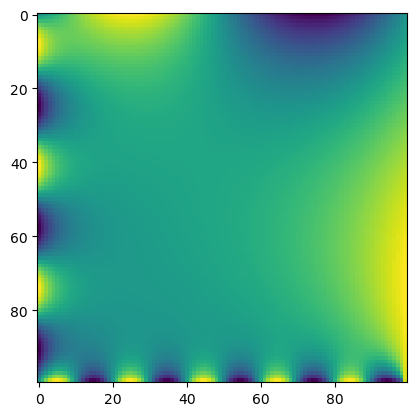

In [55]:
# Solve Laplace equation
model = LaplaceEquation(initial_lattice, max_iterations=10000, store_history=True)

grid = model.solve()

# Plot grid
plt.imshow(grid, interpolation='nearest')

In [56]:
## Make an interactive video
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    plt.figure(figsize=(6, 6))
    plt.imshow(model.history[i], interpolation='nearest')
    plt.axis('off')
    plt.show()

interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(model.history) - 1, 1, layout=Layout(width='800px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='800px'), max=5024), Output()), …

<function __main__.plotter(i)>

### Does this match our intuition?

+ What does the diffusion term do to field flucuations?
+ Intermediate values theorem for harmonic functions: extrema always on boundaries, therefore no interior extrema are possible.
+ Synchronous vs asynchronous updating (recall from cellular automata)

## Another approach: Convolutions

+ The inner loop of our solution method consists of visiting each point in the mesh and updating its value based on the average of its neighbors. This is a very simple operation, but it is repeated many times.
+ This is extremely similar to the Game of Life, and other cellular automata that we saw earlier during the course.
+ Mathematically, we can think of the Laplace equation as a convolution of the potential with a kernel that is a function of the distance between the points.

Mathemtically, a convolution has the form:

$$
f*g = \int_{-\infty}^{\infty} f(x) g(x-y) dx
$$

where $f$ and $g$ are functions, and $*$ is the convolution operator. In discrete form, this becomes:

$$
f*g = \sum_{i} f(x_i) g(x_i - y_j)
$$

where $f$ and $g$ are now arrays of values, and $*$ is the discrete convolution operator. The convolutional kernel is the function $g$, and it usually only exists on a compact interval. For the Laplace equation, the kernel in continuous time is a Gaussian, and in discrete time is a function that returns only the values of North, South, East, and West neighbors.

In [51]:
from scipy.signal import convolve2d

class LaplaceEquationConvolution(LaplaceEquation):

    def __init__(self, initial_lattice, max_iterations=10000, tolerance=1e-4, store_history=False):
        super().__init__(initial_lattice, max_iterations, tolerance, store_history)

    def update_grid(self, grid):

        ## Define convolution kernel (von Neumann neighborhood)
        kernel = 0.25 * np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

        ## Convolve grid with kernel. Note how we handle the boundary conditions.
        grid[1:-1, 1:-1] = convolve2d(grid, kernel, mode='same')[1:-1, 1:-1]

        return grid

Converged after 8670 iterations.


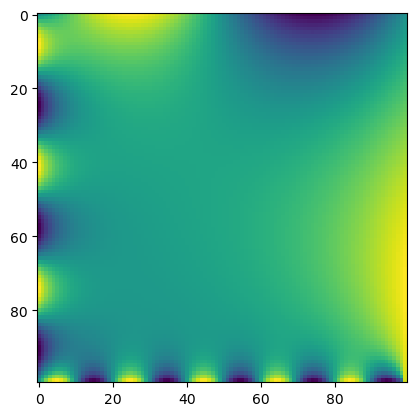

In [52]:
## Solve Laplace equation
model = LaplaceEquationConvolution(initial_lattice, max_iterations=10000)

grid = model.solve()

# Plot grid
plt.imshow(grid, interpolation='nearest')

### Remember the convolution theorem?

$$
\mathcal{F}[f*g] = \mathcal{F}[f] \cdot \mathcal{F}[g]
$$
where $\mathcal{F}$ is the Fourier transform. This is a very useful result, because it allows us to convolve functions in the frequency domain, which is much faster than convolving in the time domain.

+ This is a clue that the Fourier transform is a useful tool for solving PDEs.
+ Intuition: sines and cosines are the eigenfunctions of translation operators



### Changing domains with conformal mapping in 2D

+ The Laplace equation, and many other parabolic PDEs, are special: they are invariant under conformal mapping.
+ In the previous example, we solved Laplace's equation in a square domain. However, we can also solve Laplace's equation in other domains. For example, we can solve Laplace's equation in a circular domain by using a conformal mapping.
+ Mathematically, this is equivalent to solving Laplace's equation in a square domain, and then transforming the solution back to the circular domain via the inverse of the mapping.

The forward mapping is:
$$
\begin{align}
x &= \frac{1}{2} \left( \sqrt{1 + r^{2}} + r \right) \cos \theta \\
y &= \frac{1}{2} \left( \sqrt{1 + r^{2}} + r \right) \sin \theta
\end{align}
$$

The inverse mapping is:
$$
\begin{align}
r &= \frac{2}{\sqrt{1 + x^{2} + y^{2}}} \left( \sqrt{1 + x^{2} + y^{2}} - 1 \right) \\
\theta &= \tan^{-1} \left( \frac{y}{x} \right)
\end{align}
$$

Notice that we don't update the field values under the transform; we essentially are just rearranging our mesh points.


In [81]:
r = np.linspace(0, 1, 10)
theta = np.linspace(0, 2 * np.pi, 100)
R, Theta = np.meshgrid(r, theta)

initial_lattice_disk = np.zeros_like(R)
initial_lattice_disk[:, -1] = 1 + np.sin(Theta[:, -1] * 3)

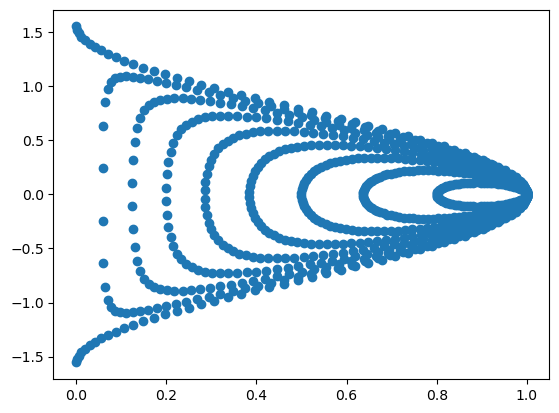

In [92]:
xx, yy = model.transform(R, Theta)
plt.scatter(xx.ravel(), yy.ravel())

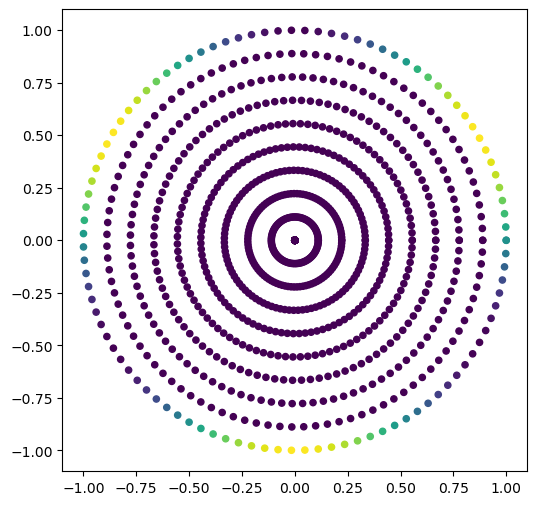

In [82]:
plt.figure(figsize=(6, 6))
plt.scatter(R * np.cos(Theta), R * np.sin(Theta), c=initial_lattice_disk, s=20)

In [95]:
## Solve the Laplace equation on a disk with conformal mapping

class LaplaceEquationConformal(LaplaceEquation):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs) # pass everything to the parent Laplace constructor

    def transform(self, u, v):
        raise NotImplementedError

    def inverse_transform(self, x, y):
        raise NotImplementedError

    def update_grid(self, grid):

        ## Transform grid
        x, t = self.transform(grid)

        ## Define convolution kernel (von Neumann neighborhood)
        kernel = 0.25 * np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

        ## Convolve grid with kernel. Note how we handle the boundary conditions.
        u[1:-1, 1:-1] = convolve2d(u, kernel, mode='same')[1:-1, 1:-1]
        v[1:-1, 1:-1] = convolve2d(v, kernel, mode='same')[1:-1, 1:-1]

        ## Transform grid back
        grid = self.inverse_transform(x, y)

        return grid


class LaplaceEquationDisk(LaplaceEquationConformal):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def transform(self, u, v):
        return u * np.cos(v), u * np.sin(v)

    def inverse_transform(self, x, y):
        return np.sqrt(x ** 2 + y ** 2), np.arctan2(y, x)

## Solve Laplace equation
model = LaplaceEquationDisk(initial_lattice_disk, max_iterations=10000)

## Define mesh in the domain in which we plan to perform the solving
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

## Transform into the geometry of interest, and then define boundary conditions
uu, vv = model.inverse_transform(xx, yy)
initial_lattice_disk = np.zeros_like(uu)
initial_lattice_disk[:, -1] = 1 + np.sin(vv[:, -1] * 3)

## Solve Laplace equation
grid = model.solve()

# Plot grid
plt.imshow(grid, interpolation='nearest')



        
        # def conformal_map(self, grid, inverse=False):

        #     ## Define underlying grid
        #     x = np.linspace(-1, 1, grid.shape[0])
        #     y = np.linspace(-1, 1, grid.shape[1])
        #     X, Y = np.meshgrid(x, y)

        #     ## Define conformal map
        #     if not inverse:
        #         Z = X + 1j * Y
        #         Z = Z**2 / (1 + np.abs(Z)**2)
        #         Z = np.real(Z) + 1j * np.imag(Z)
        #     else:
        #         Z = X + 1j * Y
        #         Z = Z * (1 - np.abs(Z)**2) / (1 + np.abs(Z)**2)
        #         Z = np.real(Z) + 1j * np.imag(Z)

        #     ## Map grid
        #     grid = grid[np.searchsorted(x, np.real(Z)), np.searchsorted(y, np.imag(Z))]

        #     return grid

## Define initial lattice with complex boundary conditions
initial_lattice = np.zeros((100, 100))
initial_lattice[0, :] = np.sin(np.linspace(0, 2 * np.pi, 100))
initial_lattice[-1, :] = np.sin(np.linspace(0, 2 * np.pi * 5, 100))
initial_lattice[:, 0] = np.sin(np.linspace(0, 2 * np.pi * 3, 100))
initial_lattice[:, -1] = np.sin(np.linspace(0, 2 * np.pi / 3, 100))



## Solve Laplace equation
model = LaplaceEquationDisk(initial_lattice, max_iterations=10000, store_history=True)

grid = model.solve()

# Plot grid
plt.imshow(model.history[0], interpolation='nearest')

TypeError: LaplaceEquationDisk.transform() missing 1 required positional argument: 'v'

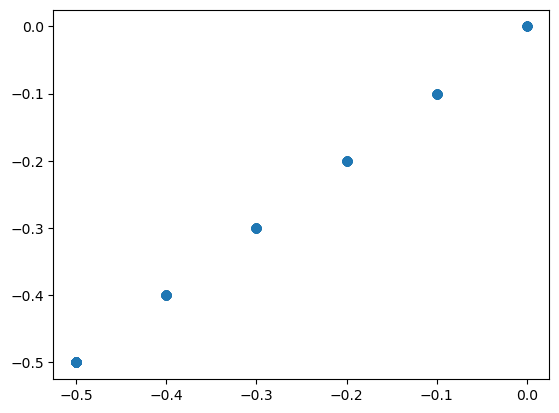

In [72]:
## make a 2D list of points on a regular grid

def make_grid(xmin, xmax, ymin, ymax, dx, dy):
    x = np.arange(xmin, xmax + dx, dx)
    y = np.arange(ymin, ymax + dy, dy)
    X, Y = np.meshgrid(x, y)
    return np.vstack([X.ravel(), Y.ravel()]).T

## make a 2D list of points on a regular grid
pts = make_grid(-1, 1, -1, 1, 0.1, 0.1)

# plt.plot(pts[:, 0], pts[:, 1], 'o')

pts2 = model.conformal_map(pts).T

plt.plot(pts2[:, 0], pts2[:, 1], 'o')

In [61]:
pts.shape

(2, 441)

In [ ]:
def map_to_disk(u, v):
    """Map points from the unit square to the unit disk."""
    theta = 2 * np.pi * u
    r = np.sqrt(v)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

def map_to_square(x, y):
    """Map points from the unit disk to the unit square."""
    r = np.sqrt(x**2 + y**2)
    u = np.arctan2(y, x) / (2 * np.pi)
    v = r**2
    return u, v

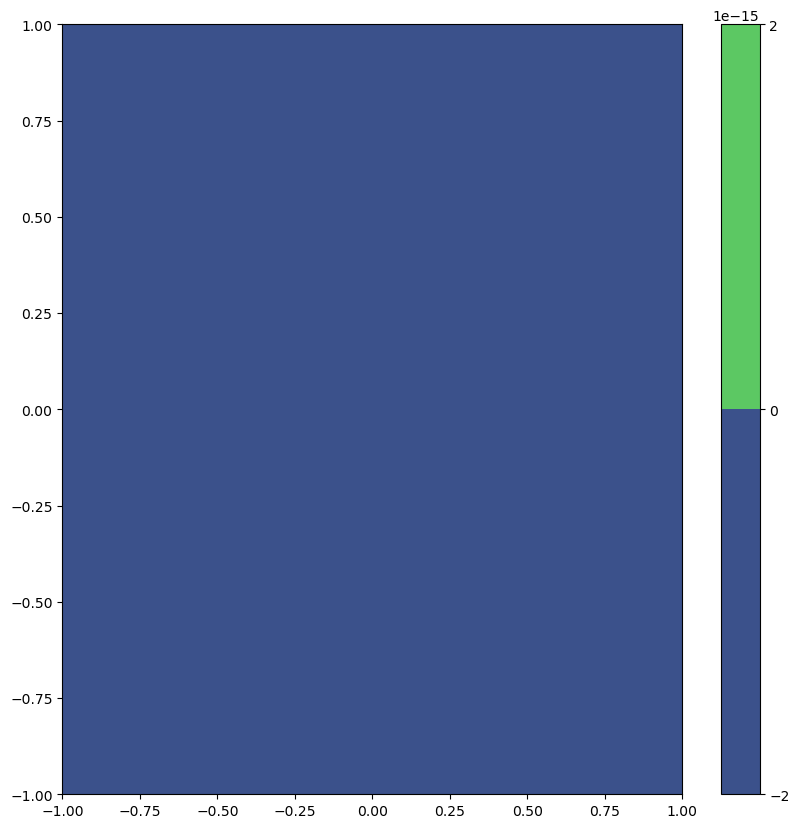

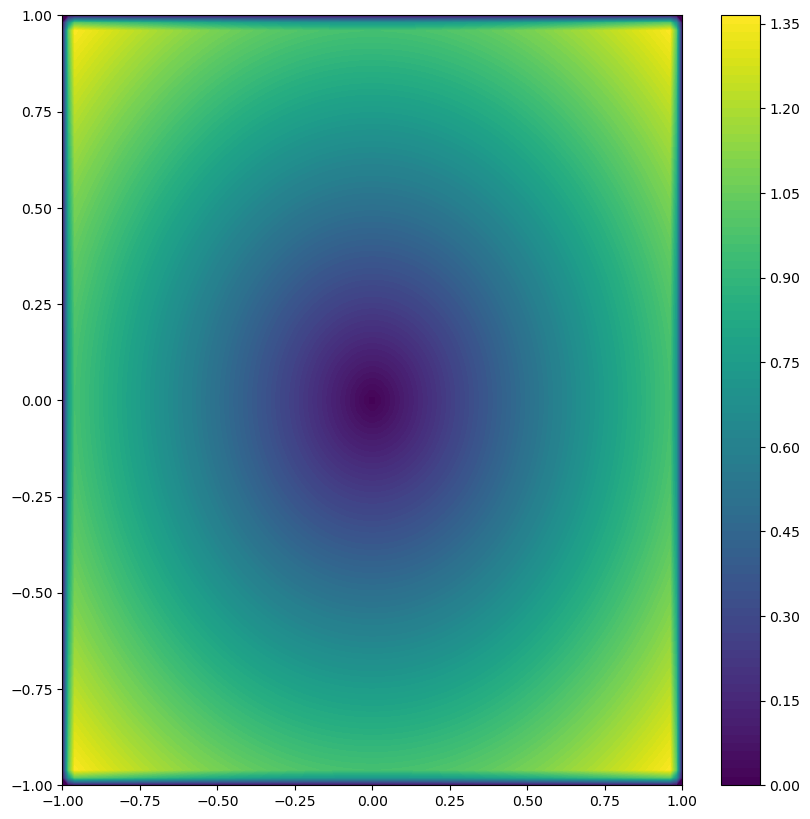

In [2]:
class LaplaceDisk(LaplaceEquation):

    def __init__(self, initial_lattice, max_iterations=10000, tolerance=1e-4, store_history=False):
        super().__init__(initial_lattice, max_iterations, tolerance, store_history)

    def update_grid(self, grid):

        ## Map grid to disk
        u, v = map_to_square(np.linspace(-1, 1, self.n), np.linspace(-1, 1, self.m), indexing='ij')

        ## Map grid back to disk
        grid = grid / np.sqrt(v)

        return grid


initial_lattice = np.zeros((100, 100))
    

### Couldn't we have just solved in polar coordinates directly?

+ Can use much more elaborate mappings, such as the one shown below. A common one is the "inside out" transform, which the interior of the domain to the exterior of the domain
+ Shwarz-Christoffel mapping: transform any polygonaal domain into a square domain, then solve Laplace's equation in the square domain, then transform back to the original domain.
+ Software packages exist that take a user-defined polygon and calculate the exact Shwarz-Christoffel mapping for that domain.



## Solving in time: Finite-differences

+ With the Laplace equation, we were able to use our domain knowledge to devise a *relaxation* solution scheme that approximates the path integral around a mesh cell.

+ In general, we can't do this. Instead, we must use a more general method to solve the differential equation. The simplest method is to use a finite-difference method, which is a method of approximating the derivative of a function by using the values of the function at two or more points.

+ Suppose that we want to solve the heat equation in a 2D domain, $u(x,y,t)$, where the initial condition is $u(x,y,0) = f(x,y)$, and the boundary conditions are $u(x,y,t) = 0$ for $x = 0$ and $x = L$. The heat equation is:

$$
\frac{\partial u}{\partial t} = D \left( \frac{\partial^{2} u}{\partial x^{2}} + \frac{\partial^{2} u}{\partial y^{2}} \right)
$$

where $\alpha$ is the thermal diffusivity. We can solve this equation by discretizing in time, and then using the finite difference method to discretize in space. The resulting equation is:

$$
\frac{u_{i,j}^{n+1} - u_{i,j}^{n}}{\Delta t} = D \left( \frac{u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n}}{\Delta x^{2}} + \frac{u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n}}{\Delta y^{2}} \right)
$$

where $u_{i,j}^{n}$ is the value of $u$ at the point $(x_i, y_j)$ at time $t_n$. We can rearrange this equation to solve for $u_{i,j}^{n+1}$:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} + D\left( \frac{\Delta t}{\Delta x^{2}} \left( u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n} \right) + \frac{\Delta t}{\Delta y^{2}} \left( u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n} \right) \right)
$$

We can use the same approach as before, and use a loop to update the values of $u$ at each time step.

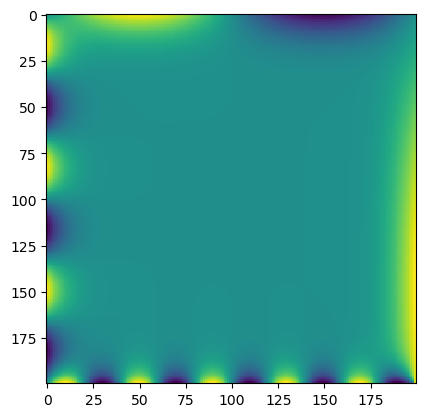

In [51]:
class LaplaceFiniteDifference:

    def __init__(self, initial_lattice, diffusivity=1.0, dt=1e-3, L=1.0, max_iterations=10000, tolerance=1e-4, store_history=False):
        self.initial_lattice = initial_lattice
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.store_history = store_history
        self.diffusivity = diffusivity
        self.dt = dt
        self.dx = L / (initial_lattice.shape[0] - 1)

    def solve(self):

        ## Initialize grid
        grid = self.initial_lattice.copy()

        ## Initialize history
        if self.store_history:
            self.history = [grid.copy()]

        ## Initialize iteration counter
        iteration = 0

        ## Initialize error
        error = np.inf

        ## Iterate until convergence
        while iteration < self.max_iterations and error > self.tolerance:
                
                ## Update grid
                grid = self.update_grid(grid)
    
                ## Update error
                error = np.max(np.abs(grid - self.history[-1]))
    
                ## Update iteration counter
                iteration += 1
    
                ## Update history
                if self.store_history:
                    self.history.append(grid.copy())

        return grid

    def update_grid(self, grid):
        ## Update grid using finite difference method
        
        k1 = grid[1:-1, 1:-1]

        k2 = grid[1:-1, 2:]
        k3 = grid[1:-1, :-2]
        k4 = grid[2:, 1:-1]
        k5 = grid[:-2, 1:-1]

        grid[1:-1, 1:-1] += self.dt * self.diffusivity * (k2 + k3 + k4 + k5 - 4 * k1) / self.dx**2

        return grid





        

# Define initial lattice and complex boundary conditions
n_x = 200
initial_lattice = np.zeros((n_x, n_x))
initial_lattice[0, :] = np.sin(np.linspace(0, 2 * np.pi, n_x))
initial_lattice[-1, :] = np.sin(np.linspace(0, 2 * np.pi * 5, n_x))
initial_lattice[:, 0] = np.sin(np.linspace(0, 2 * np.pi * 3, n_x))
initial_lattice[:, -1] = np.sin(np.linspace(0, 2 * np.pi / 3, n_x))

from scipy.signal import convolve2d

## Solve Laplace equation
model = LaplaceFiniteDifference(initial_lattice, dt=1e-6, max_iterations=10000, store_history=True)

grid = model.solve()

# Plot grid
plt.imshow(model.history[-1], interpolation='nearest')





### Try modifying the space and time steps. What happens to the solution?

### von Neumann stability condition

+ Our finite-difference method blew up when we used a large time step. This is because the method is not stable. The von Neumann stability condition is a condition that must be satisfied for a finite-difference method to be stable. For a given PDE, this condition is derived by considering the linear stability of different spatial Fourier modes. For the heat equation, it is given by:

$$
\frac{\Delta t}{\Delta x^{2}} \leq \frac{1}{2 D}
$$

+  Our timestepping method is not the most efficient way to solve this equation. Instead, we can use a method called Crank-Nicolson, which is a second-order method that is more stable than the first-order method that we used above.

In [50]:
print(model.dt/(model.dx**2), 1 / (2 * model.diffusivity))

0.39601000000000003 0.5


## Solving in time: Crank-Nicolson

The Crank-Nicolson scheme is an alternative update scheme for the heat equation. It is a second-order method, and is more stable than the first-order method that we used above. The Crank-Nicolson scheme is given by:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} + \frac{D\Delta t}{2} \left( \frac{1}{\Delta x^{2}} \left( u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n} \right) + \frac{1}{\Delta y^{2}} \left( u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n} \right) \right)
$$

$$
+ \frac{D\Delta t}{2} \left( \frac{1}{\Delta x^{2}} \left( u_{i+1,j}^{n+1} - 2u_{i,j}^{n+1} + u_{i-1,j}^{n+1} \right) + \frac{1}{\Delta y^{2}} \left( u_{i,j+1}^{n+1} - 2u_{i,j}^{n+1} + u_{i,j-1}^{n+1} \right) \right)
$$

The Crank-Nicolson scheme is a second-order method, and Fourier mode analysis can be used to show that this scheme is *unconditionally stable*